# Understanding Descriptive Statistics

Import the necessary libraries here:

In [44]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [45]:
# your code here
def dice():
    dado = []
    for i in range(10):
        dado.append(random.choice(range(1,7)))
    return dado
dice()
lst=dice()

In [46]:
df = pd.DataFrame(lst, columns=['Rolls'])

#### 2.- Plot the results sorted by value.

In [47]:
# your code here
df_sorted = df.sort_values(by='Rolls').reset_index(drop=True)
df_sorted

,Rolls
0,1
1,2
2,3
3,3
4,4
5,5
6,6
7,6
8,6
9,6


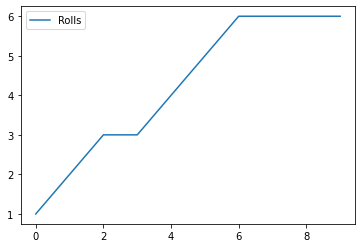

In [48]:
df_sorted.plot();

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [49]:
# your code here
df_freq=df.value_counts()

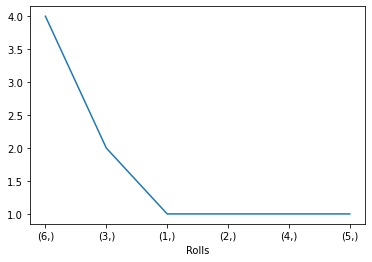

In [50]:
df_freq.plot();

In [51]:
"""
In the first plot we can see that is ascending because it is order by the rolls but in the second one its ordenaer by 
"""

'\nIn the first plot we can see that is ascending because it is order by the rolls but in the second one its ordenaer by \n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [52]:
# your code here
def mean(df, column):
    mean = df[column].sum()/len(df[column])
    return mean

In [53]:
mean(df, 'Rolls')

4.2

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [54]:
# your code here
def freq(data): 
    freq = data.value_counts()
    return freq
    
def mean_freq(data, column): 
    df_freq = pd.DataFrame(data, columns=['Rolls']).reset_index().sort_values(by= column)
    df_frec['Value'] = df_frec[column]*df_frec['Rolls']
    mean=sum(df_frec['Value'])/len(df_frec['Rolls'])
    return mean

In [55]:
frequency = freq(df)
mean(df, 'Rolls')

4.2

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [56]:
# your code here
sort_df=df.sort_values(by=['Rolls'],ascending=True)
df_list = df['Rolls'].tolist()
df_list.sort()
df_list

[1, 2, 3, 3, 4, 5, 6, 6, 6, 6]

In [57]:
def median(l):
    half = len(df_list) // 2
    df_list.sort()
    if not len(df_list) % 2:
        return (df_list[half - 1] + df_list[half]) / 2.0
    return df_list[half]

print(median(lst))

4.5


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [58]:
# your code here
def statistical_quartiles(dataset, column, quartil):
    lst = dataset[column].tolist()
    if quartil == 'Q1':
        data = sorted(lst)
        index = len(data) // 4
        #Par, si el resto es 0.  
        if len(lst) % 2 != 0:
            return data[index]
        #Impar, si el resto != de 0.
        else:
            return (data[index - 1] + data[index]) / 2
        
    elif quartil == 'Q2':
        data = sorted(lst)
        index = len(data) // 2
        #Par, si el resto es 0.  
        if len(lst) % 2 != 0:
            return data[index]
        #Impar, si el resto != de 0.
        else:
            return (data[index - 1] + data[index]) / 2
    
    elif quartil == 'Q3':
        data = sorted(lst)
        index = len(data)*3 // 4
        #Par, si el resto es 0.  
        if len(lst) % 2 != 0:
            return data[index]
        #Impar, si el resto != de 0.
        else:
            return (data[index - 1] + data[index]) / 2

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

,Unnamed: 0,roll,value
0,0,0,1
47,47,47,1
56,56,56,1
9,9,9,1
73,73,73,1
...,...,...,...
17,17,17,6
11,11,11,6
24,24,24,6
21,21,21,6


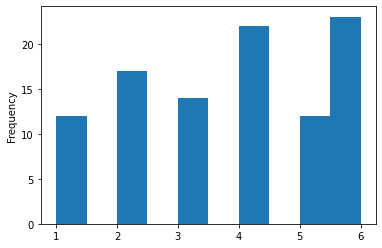

In [59]:
# your code here
df_hundred= pd.read_csv('../data/roll_the_dice_hundred.csv')
df_hundred_sorted = df_hundred.sort_values(by='value')
df_hundred_sorted['value'].plot.hist();
df_hundred_sorted

In [60]:
"""
your comments here
"""


'\nyour comments here\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [61]:
# your code here
mean(df_hundred_sorted, 'value')

3.74

#### 3.- Now, calculate the frequency distribution.


In [64]:
freq_hundred= freq(df_hundred_sorted[['value']])
freq_hundred

value
6        23
4        22
2        17
3        14
1        12
5        12
dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

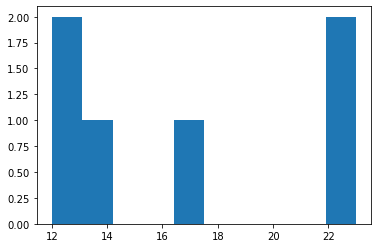

In [65]:
# your code here
freq_df=pd.DataFrame(freq_hundred, columns=['Frequency'])
plt.hist(freq_df);

In [66]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

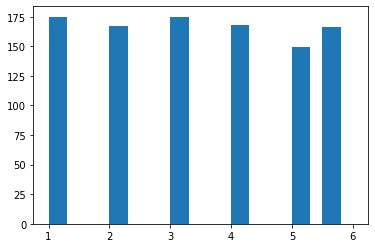

In [67]:
# your code here
df_thousand= pd.read_csv('../data/roll_the_dice_thousand.csv')
df_thousand_sorted=df_thousand.sort_values(by='value')
freq_thousand= freq(df_thousand_sorted[['value']])
#freq_thousand_df=pd.DataFrame(freq_thousand)

plt.hist(df_thousand_sorted[['value']],width =0.3,align='mid');


In [68]:
"""
the data does not follow any rules. all of them have the same probability
"""

'\nthe data does not follow any rules. all of them have the same probability\n'

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

'\nI think the mean is 36 and std around 10\n'

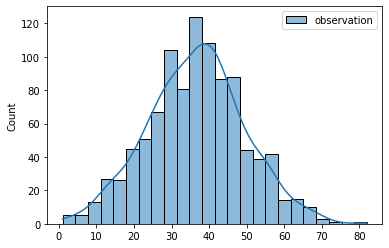

In [69]:
# your code here
df_poll1= pd.read_csv('../data/ages_population.csv')
freq_poll_1 = freq(df_poll1[['observation']])
freq_poll1_df=pd.DataFrame(freq_poll_1, columns=['Frequency'])

sns.histplot(df_poll1, kde = True);

"""
I think the mean is 36 and std around 10
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [70]:
# your code here
mean_poll1 = df_poll1.mean()
std_poll1 = df_poll1.std()
print(mean_poll1)
print(std_poll1)

observation    36.56
dtype: float64
observation    12.8165
dtype: float64


In [71]:
"""
Yes, both fall inside the ranges I guesses. The mean is the largest bar in the plot and the standard deviation is around 10.
"""

'\nYes, both fall inside the ranges I guesses. The mean is the largest bar in the plot and the standard deviation is around 10.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

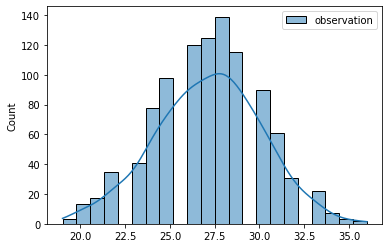

In [72]:
# your code here
df_poll2= pd.read_csv('../data/ages_population2.csv')
freq_poll_2 = freq(df_poll2[['observation']])
freq_poll2_df=pd.DataFrame(freq_poll_2, columns=['Frequency'])

sns.histplot(df_poll2, kde = True);


####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [73]:
"""
your comments here
"""

'\nyour comments here\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [74]:
# your code here
mean_poll2 = df_poll2.mean()
std_poll2 = df_poll2.std()
print(mean_poll2)
print(std_poll2)

observation    27.155
dtype: float64
observation    2.969814
dtype: float64


In [75]:
"""
your comments here
"""

'\nyour comments here\n'

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

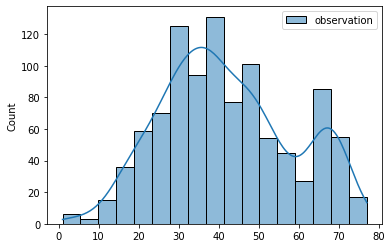

In [402]:
# your code here
df_poll3= pd.read_csv('../data/ages_population3.csv')
freq_poll_3 = freq(df_poll3[['observation']])
freq_poll3_df=pd.DataFrame(freq_poll_3, columns=['Frequency'])

sns.histplot(df_poll3, kde = True);

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [403]:
# your code here
mean_poll3 = df_poll3.mean()
std_poll3 = df_poll3.std()
print(mean_poll3)
print(std_poll3)

observation    41.989
dtype: float64
observation    16.144706
dtype: float64


In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""